### Insight projects over time 

Objective:

The company seeks to determine if there are specific periods during the year when a higher number of projects occur. This information will help in optimizing the distribution of work more evenly throughout the year.

In [106]:
import pandas as pd
import numpy as np
import json 
import re
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [107]:
issue_field_context = pd.read_excel('jira_issue_custom_field_contexts.xlsx')
issue_field_option = pd.read_excel('jira_issue_custom_field_options.xlsx')
issue_field = pd.read_excel ('jira_issue_field.xlsx')
issue_types = pd.read_excel('jira_issue_types.xlsx')
projects = pd.read_excel('jira_projects.xlsx')
sprint_issue = pd.read_excel ('jira_sprint_issues.xlsx')
sprint = pd.read_excel('jira_sprints.xlsx')
users = pd.read_excel('jira_users.xlsx')
users_groups = pd.read_csv('jira_user_groups_detailed_2024-09-03T06_49_22.915133Z.csv')
tempo = pd.read_csv('tempo_worklogs_all_2024-09-02T12_36_40.38184Z.csv')
issues = pd.read_excel('Jira_issue.xlsx')


In [108]:
#je pars de ma table sprint_issue
#fonction parsing pour extraire le status de Fiedls
def parse_fields(fields_json):
    try:
        fields = json.loads(fields_json)  # Convertir le JSON en dictionnaire
        return pd.Series({
            'status': fields['status']['name']  #Extraire le nom du status
        })
    except (json.JSONDecodeError, KeyError):
        return pd.Series({'status': None})  # Retourner None en cas d'erreur

# extraire les status
parsed_fields = sprint_issue['fields'].apply(parse_fields)

# Vérifier si la colonne 'status' existe déjà car dès que je run ca fait une nouvelle colonne identique
if 'status' not in sprint_issue.columns:
    sprint_issue = pd.concat([sprint_issue, parsed_fields], axis=1)

sprint_issue.head(3)

,id,key,fields,issueId,updated,sprintId,status
0,24-10368,PHONES-100,"{""status"": {""id"": ""10007"", ""name"": ""Terminé"", ...",10368,2023-06-27 12:18:50.007,24,Terminé
1,24-10379,Malaga-5,"{""status"": {""id"": ""10007"", ""name"": ""Terminé"", ...",10379,2023-07-17 10:02:59.597,24,Terminé
2,24-10384,Seville-7,"{""status"": {""id"": ""10007"", ""name"": ""Terminé"", ...",10384,2023-04-24 10:17:10.634,24,Terminé


In [109]:
#faire un merge entre sprint et sprint_issues pour obtenir la startdate et la enddate de chaque sprint (important pour le calcul de temps)
merged_df = pd.merge(sprint, sprint_issue, left_on='id', right_on='sprintId')
sprint_issues = merged_df
sprint_issues

,id_x,name,state,endDate,startDate,completeDate,id_y,key,fields,issueId,updated,sprintId,status
0,24,Sprint 60,closed,2020-04-21 08:00:00,2020-04-10 08:59:21,2020-04-24 11:43:36,24-10368,PHONES-100,"{""status"": {""id"": ""10007"", ""name"": ""Terminé"", ...",10368,2023-06-27 12:18:50.007,24,Terminé
1,24,Sprint 60,closed,2020-04-21 08:00:00,2020-04-10 08:59:21,2020-04-24 11:43:36,24-10379,Malaga-5,"{""status"": {""id"": ""10007"", ""name"": ""Terminé"", ...",10379,2023-07-17 10:02:59.597,24,Terminé
2,24,Sprint 60,closed,2020-04-21 08:00:00,2020-04-10 08:59:21,2020-04-24 11:43:36,24-10384,Seville-7,"{""status"": {""id"": ""10007"", ""name"": ""Terminé"", ...",10384,2023-04-24 10:17:10.634,24,Terminé
3,24,Sprint 60,closed,2020-04-21 08:00:00,2020-04-10 08:59:21,2020-04-24 11:43:36,24-10464,MUL-24,"{""status"": {""id"": ""10007"", ""name"": ""Terminé"", ...",10464,2023-09-22 14:13:39.975,24,Terminé
4,24,Sprint 60,closed,2020-04-21 08:00:00,2020-04-10 08:59:21,2020-04-24 11:43:36,24-10465,MUL-25,"{""status"": {""id"": ""10007"", ""name"": ""Terminé"", ...",10465,2023-09-22 14:12:50.940,24,Terminé
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12460,113,Sprint 96,future,NaT,NaT,NaT,113-21850,SUPCAY-7,"{""status"": {""id"": ""10022"", ""name"": ""Planif"", ""...",21850,2024-08-26 14:41:57.059,113,Planif
12461,113,Sprint 96,future,NaT,NaT,NaT,113-22018,DAK-548,"{""status"": {""id"": ""10017"", ""name"": ""A développ...",22018,2024-08-26 15:14:45.367,113,A développer
12462,113,Sprint 96,future,NaT,NaT,NaT,113-22038,SUPCAY-9,"{""status"": {""id"": ""10022"", ""name"": ""Planif"", ""...",22038,2024-08-27 09:17:45.746,113,Planif
12463,113,Sprint 96,future,NaT,NaT,NaT,113-22041,SUPCAY-10,"{""status"": {""id"": ""10022"", ""name"": ""Planif"", ""...",22041,2024-08-27 09:15:41.364,113,Planif


In [110]:
df = issues

In [ ]:
#ajouter les customfields sur la table issues --> code Céline
# extraire les customfields de la colonne 'fields'
import json
def extract_customfields(fields):
    if isinstance(fields, str):
        try:
            fields_dict = json.loads(fields) #Le JSON est chargé dans un dictionnaire Python en utilisant json.loads().
        except json.JSONDecodeError:
            return pd.Series()
    elif isinstance(fields, dict):
        fields_dict = fields
    else:
        return pd.Series()
    customfields = {key: value for key, value in fields_dict.items() if key.startswith('customfield_')} #Les paires clé-valeur correspondantes sont stockées dans custom_fields.
    return pd.Series(customfields)
# Appliquer la fonction à la colonne 'fields', pour toutes les lignes
customfields_df = df['fields'].apply(extract_customfields)
# Fusionner les customfields extraits avec le DataFrame original
result_df_customfields = pd.concat([df, customfields_df], axis=1)
result_df_customfields

In [112]:
#drop colonne inutiles des customfields
result_df_customfields_clean = result_df_customfields.drop(columns = [
 "customfield_10019",
 "customfield_10033",
 "customfield_10052",
 "customfield_10020",
 "customfield_10024",
 "customfield_10070",
 "customfield_10012",
 "customfield_10013",
 "customfield_10017",
 "customfield_10002",
 "customfield_10063",
 "customfield_10064",
 "customfield_10065",
 "customfield_10066" ,
 "customfield_10010" ,
 "customfield_10027" ,
 "customfield_10045",
 "customfield_10123",
 "customfield_10025",
 "customfield_10021",
 "customfield_10055",
 "customfield_10082",
 "customfield_10074" ,
 "customfield_10076" ,
 "customfield_10077" ,
 "customfield_10078",
 "customfield_10079" ,
 "customfield_10080",
 "customfield_10081" ,
 "customfield_10046" ,
 "customfield_10084" ,
 "customfield_10003",
 "customfield_10109" ,
 "customfield_10086" ,
 "customfield_10087" ,
 "customfield_10089",
 "customfield_10090" ,
 "customfield_10091",
 "customfield_10092",
 "customfield_10093" ,
 "customfield_10094" ,
 "customfield_10095" ,
 "customfield_10096" ,
 "customfield_10097" ,
 "customfield_10098" ,
 "customfield_10099"  ,
 "customfield_10100"  ,
 "customfield_10101" ,
 "customfield_10085" ,
 "customfield_10083" ,
 "customfield_10034" ,
 "customfield_10035" ,
 "customfield_10106" ,
 "customfield_10118" ,
 "customfield_10120" ,
 "customfield_10122" ,
 "customfield_10107" ,
 "customfield_10130" ,
 "customfield_10054" ,
 "customfield_10000",
 "customfield_10015"
], axis = 1)
result_df_customfields_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 10324 non-null  int64         
 1   key                10324 non-null  object        
 2   fields             10324 non-null  object        
 3   updated            10323 non-null  datetime64[ns]
 4   changelog          10323 non-null  object        
 5   projectId          10323 non-null  float64       
 6   projectKey         10324 non-null  object        
 7   transitions        10324 non-null  object        
 8   renderedFields     10324 non-null  object        
 9   customfield_10018  8901 non-null   object        
 10  customfield_10011  81 non-null     object        
 11  customfield_10102  262 non-null    object        
 12  customfield_10103  96 non-null     float64       
 13  customfield_10001  1988 non-null   object        
 14  custom

In [113]:
#renommer les colonnes CF restantes pour savoir à quoi elles correspondent
result_df_customfields_clean.rename(columns=
{"customfield_10018":"Parent_link",
"customfield_10011": "Epic_name",
"customfield_10102": "Road_map_produit",
"customfield_10103": "Macro_estimation_epic_heure",
"customfield_10001": "Team",
"customfield_10014" :"Epic_link",
"customfield_10043" :"Domaine_technique",
"customfield_10053" :"Criticité",
"customfield_10108" :"Responsabilité_projet",
"customfield_10104" :"Temps_consigné_tempo_epic",
"customfield_10075" :"TMA_Environement",
"customfield_10004": "Impact_sur_utilisateur"},
inplace= True)

In [114]:
issues = result_df_customfields_clean

In [ ]:
issues

In [116]:
#ajouter l'extraction des "priority" + "issue_type" de la table issues
#extraction de priority et de issuetype
def extract_priority_and_issuetype(fields):
    if isinstance(fields, str):
        try:
            fields_dict = json.loads(fields)
        except json.JSONDecodeError:
            return pd.Series({'priority': None, 'issuetype': None})
    elif isinstance(fields, dict):
        fields_dict = fields
    else:
        return pd.Series({'priority': None, 'issuetype': None})

    # Extraction des valeurs 'name' pour 'priority' et 'issuetype'
    priority = fields_dict.get('priority', {}).get('name')
    issuetype = fields_dict.get('issuetype', {}).get('name')

    return pd.Series({'priority': priority, 'issuetype': issuetype})

# Appliquer la fonction à la colonne 'fields_x' pour toutes les lignes du DataFrame 'issues'
extracted_data = issues['fields'].apply(extract_priority_and_issuetype)

# Ajouter les nouvelles colonnes 'priority' et 'issuetype' au DataFrame original
issues[['priority', 'issuetype']] = extracted_data

In [117]:
issues.info() #--> None dans priority et issuetype car pb extraction Json dans Python mais ok sur Métabase

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           10324 non-null  int64         
 1   key                          10324 non-null  object        
 2   fields                       10324 non-null  object        
 3   updated                      10323 non-null  datetime64[ns]
 4   changelog                    10323 non-null  object        
 5   projectId                    10323 non-null  float64       
 6   projectKey                   10324 non-null  object        
 7   transitions                  10324 non-null  object        
 8   renderedFields               10324 non-null  object        
 9   Parent_link                  8901 non-null   object        
 10  Epic_name                    81 non-null     object        
 11  Road_map_produit             262 non-null

In [ ]:
#merge de la nouvelle table sprint_issues avec issues
merge_sprint_issues = pd.merge(sprint_issues, issues, left_on='issueId', right_on='id', how='left')
merge_sprint_issues

In [119]:
merge_sprint_issues['priority'].value_counts()

priority
Moyenne         7023
Haute           1738
TrÃ¨s haute      279
Basse            274
HOTFIX (Bug)      27
Name: count, dtype: int64

In [ ]:
#regarder la table des temps 
tempo

In [ ]:
#extraction de Account Id table Tempo (pour joindre avec users_groups)

# Fonction pour extraire l'accountId du JSON
def extract_account_id(author_json):
    try:
        author_dict = json.loads(author_json)  # Convertir le JSON en dictionnaire
        return author_dict.get('accountId')  # Extraire l'accountId
    except (json.JSONDecodeError, TypeError):
        return None  # Retourner None en cas d'erreur

# Appliquer la fonction pour créer une nouvelle colonne 'account_id'
tempo['account_id'] = tempo['author'].apply(extract_account_id)

print(tempo[['author', 'account_id']])

In [ ]:
#Suppression des colonnes inutiles de TEMPO
# colonnes existantes
print("Colonnes existantes dans le DataFrame :")
print(tempo.columns.tolist())

#colonnes à supprimer
columns_to_drop = ['self', 'createdAt', '_airbyte_raw_id', '_airbyte_extracted_at', '_airbyte_meta']
# Suppression des colonnes spécifiques 
tempo = tempo.drop(columns=columns_to_drop, errors='ignore')

In [123]:
#extraction des ID de TEMPO (pour faire le merge après)
def extract_id(issue_json):
    try:
        issue_dict = json.loads(issue_json)  # Convertir le JSON en dictionnaire
        return issue_dict.get('id')  # Extraire l'ID
    except (json.JSONDecodeError, TypeError):
        return None  # Retourner None en cas d'erreur

# Appliquer la fonction pour créer une nouvelle colonne 'issue_id'
tempo['issue_id'] = tempo['issue'].apply(extract_id)

In [ ]:
tempo

In [125]:
tempo['timeSpentSeconds'] = tempo['timeSpentSeconds'].str.replace(' ', '')  # Supprimer les espaces car pb dans la colonne
tempo['timeSpentSeconds'] = tempo['timeSpentSeconds'].astype(float)
tempo['timeSpentSeconds'].sum() #--> verif si ok sum vs le excel

207532080.0

In [ ]:
#merge de la nouvelle table merge_sprint_issues avec TEMPO
merge_sprint_issues_tempo = pd.merge(merge_sprint_issues, tempo, left_on='issueId', right_on='issue_id', how='left')
merge_sprint_issues_tempo.sample()

In [ ]:
result = merge_sprint_issues_tempo.loc[merge_sprint_issues_tempo['id_x'] == "prévu. De très gros soucis"]

# Afficher le résultat
print(result)

In [128]:
merge_sprint_issues_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49692 entries, 0 to 49691
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id_x                         49692 non-null  int64         
 1   name                         49692 non-null  object        
 2   state                        49692 non-null  object        
 3   endDate                      49559 non-null  datetime64[ns]
 4   startDate_x                  49559 non-null  datetime64[ns]
 5   completeDate                 48412 non-null  datetime64[ns]
 6   id_y                         49692 non-null  object        
 7   key_x                        49692 non-null  object        
 8   fields_x                     49692 non-null  object        
 9   issueId                      49692 non-null  int64         
 10  updated_x                    49692 non-null  datetime64[ns]
 11  sprintId                     49692 non-nu

In [129]:
#calculer les estimations commerciales 
issues[issues['Macro_estimation_epic_heure'].notnull()]['Macro_estimation_epic_heure'].sum()

11253.0

In [130]:
merge_sprint_issues_tempo['Macro_estimation_epic_heure'].notnull().sum()

25

In [ ]:
merge_sprint_issues

In [132]:
#merge de users_group a la table merge spritn issye tempo 
merge_sprint_issues_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49692 entries, 0 to 49691
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id_x                         49692 non-null  int64         
 1   name                         49692 non-null  object        
 2   state                        49692 non-null  object        
 3   endDate                      49559 non-null  datetime64[ns]
 4   startDate_x                  49559 non-null  datetime64[ns]
 5   completeDate                 48412 non-null  datetime64[ns]
 6   id_y                         49692 non-null  object        
 7   key_x                        49692 non-null  object        
 8   fields_x                     49692 non-null  object        
 9   issueId                      49692 non-null  int64         
 10  updated_x                    49692 non-null  datetime64[ns]
 11  sprintId                     49692 non-nu

In [133]:
users_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   key                    0 non-null      float64
 1   name                   0 non-null      float64
 2   self                   1809 non-null   object 
 3   active                 1809 non-null   bool   
 4   expand                 1809 non-null   object 
 5   groups                 1809 non-null   object 
 6   locale                 1809 non-null   object 
 7   timeZone               1809 non-null   object 
 8   accountId              1809 non-null   object 
 9   avatarUrls             1809 non-null   object 
 10  accountType            1809 non-null   object 
 11  displayName            1809 non-null   object 
 12  emailAddress           1733 non-null   object 
 13  applicationRoles       1809 non-null   object 
 14  _airbyte_raw_id        1809 non-null   object 
 15  _air

In [ ]:
# Fonction pour extraire le nom de l'équipe
def extract_team_name(groups_json):
    try:
        # Convertir la chaîne JSON en dictionnaire
        groups = json.loads(groups_json)
        
        # Parcourir les éléments de la clé 'items'
        for item in groups.get('items', []):
            if 'name' in item and item['name'].startswith('team:'):
                return item['name']
    except json.JSONDecodeError:
        print(f"Erreur de décodage JSON pour: {groups_json}")
    except Exception as e:
        print(f"Erreur inattendue: {e}")
    
    return None

#fonction pour extraire le nom de l'équipe et créernouvelle colonne 'team'
users_groups['team'] = users_groups['groups'].apply(extract_team_name) #--> il y a des tickets qui sont fait par auucne team

users_groups

In [ ]:
#clean de ma table users_group
users_groups_clean = users_groups.drop(columns = [
 "key",
 "name",
 "self",
 "expand",
 "locale",
 "timeZone",
 "avatarUrls",
 "_airbyte_raw_id",
 "_airbyte_extracted_at",
 "_airbyte_meta"], axis = 1)

users_groups = users_groups_clean
users_groups

In [ ]:
#merge du df avec users_groups pour avoir les groupes (sur accoundID)
df_final = pd.merge(merge_sprint_issues_tempo, users_groups, left_on='account_id', right_on='accountId', how='left')
df_final

In [ ]:
#obtenir le nombre de projet par sprint : sur combien de projets en même temps les équipes travaillent-elles par sprints ?
#groupby sprint et count 'project_name'
filtered_df = df_final[df_final['timeSpentSeconds'].notna()]

# Compter le nombre de projets par sprintId et projectKey
nb_projet_sprint = filtered_df.groupby(['name', 'projectKey']).size().unstack(fill_value=0)
print(nb_projet_sprint)

In [138]:
# Filtrer les lignes sans timeSpentSeconds
filtered_df = df_final[df_final['timeSpentSeconds'].notna()]

# Compter le nombre de projets par sprintId et projectKey
nb_projet_sprint = filtered_df.groupby(['name', 'projectKey']).size().unstack(fill_value=0)

# Réinitialiser l'index pour que 'name' devienne une colonne
nb_projet_sprint = nb_projet_sprint.reset_index()

# Calculer le nombre total de projets par sprint
#nb_projet_sprint['Total_issues'] = nb_projet_sprint.iloc[:, 1:].sum(axis=1)
# Remplacer les 0 par NaN afin qu'ils ne soient pas comptés
nb_projet_sprint_no_zero = nb_projet_sprint.iloc[:, 1:].replace(0, np.nan)
# Calculer le nombre de projets non nuls par sprint
nb_projet_sprint_no_zero['Total_projets'] = nb_projet_sprint_no_zero.iloc[:, 1:].count(axis=1)

In [139]:
nb_projet_sprint_nom = nb_projet_sprint['name']
nb_projet_sprint_nom= nb_projet_sprint_nom.reset_index()
nb_projet_sprint_nom.head(3)

,index,name
0,0,Sprint 59
1,1,Sprint 60
2,2,Sprint 61


In [140]:
nb_projet_sprint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        38 non-null     object
 1   AC          38 non-null     int64 
 2   AR          38 non-null     int64 
 3   BEL         38 non-null     int64 
 4   BEZ         38 non-null     int64 
 5   CAM         38 non-null     int64 
 6   CAYEN       38 non-null     int64 
 7   CLUS        38 non-null     int64 
 8   CON         38 non-null     int64 
 9   DAK         38 non-null     int64 
 10  DMC         38 non-null     int64 
 11  EVIAN       38 non-null     int64 
 12  GUAD        38 non-null     int64 
 13  IN          38 non-null     int64 
 14  MIG         38 non-null     int64 
 15  MM          38 non-null     int64 
 16  MUL         38 non-null     int64 
 17  MV          38 non-null     int64 
 18  MW          38 non-null     int64 
 19  REIMS       38 non-null     int64 
 20  ROYAN       

In [141]:
# Filtrer les lignes sans timeSpentSeconds
filtered_df = df_final[df_final['timeSpentSeconds'].notna()]

# Compter le nombre de projets par sprintId et projectKey
nb_projet_sprint = filtered_df.groupby(['name', 'projectKey']).size().unstack(fill_value=0)

# Réinitialiser l'index pour que 'name' devienne une colonne
nb_projet_sprint = nb_projet_sprint.reset_index()

# Calculer le nombre total de projets par sprint
#nb_projet_sprint['Total_issues'] = nb_projet_sprint.iloc[:, 1:].sum(axis=1)
# Remplacer les 0 par NaN afin qu'ils ne soient pas comptés
nb_projet_sprint_no_zero = nb_projet_sprint.iloc[:, 1:].replace(0, np.nan)
#nb_projet_sprint_no_zero = nb_projet_sprint.iloc[:, 1:].replace(0, np.nan)
# Calculer le nombre de projets non nuls par sprint
nb_projet_sprint_no_zero['Total_projets'] = nb_projet_sprint_no_zero.iloc[:, 1:].count(axis=1)*3

#filtrer 
#nb_projet_sprint = nb_projet_sprint.sort_values('name')
#nb_projet_sprint
nb_projet_sprint_no_zero = nb_projet_sprint_no_zero['Total_projets'] 
nb_projet_sprint_no_zero = nb_projet_sprint_no_zero.reset_index()
nb_projet_sprint_no_zero.head(3)

,index,Total_projets
0,0,3
1,1,24
2,2,30


In [142]:
#fusionner les 2 tables nbre de projet par sprint et les nom des sprints 
nbre_projet_par_sprint = pd.merge(nb_projet_sprint_no_zero,nb_projet_sprint_nom, on = 'index')
nbre_projet_par_sprint.head(3)

,index,Total_projets,name
0,0,3,Sprint 59
1,1,24,Sprint 60
2,2,30,Sprint 61


In [144]:
#fusionner avec cette table la date de début des sprint 
merge_sprint_issues_date = merge_sprint_issues[['name','startDate']]
merge_sprint_issues_date = merge_sprint_issues_date.groupby('name')['startDate'].min()
merge_sprint_issues_date= merge_sprint_issues_date.reset_index()
merge_sprint_issues_date.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       38 non-null     object        
 1   startDate  37 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 740.0+ bytes


In [145]:
date_sprint_projetnb = pd.merge( nbre_projet_par_sprint, merge_sprint_issues_date, on='name')

date_sprint_projetnb = date_sprint_projetnb.drop(37)

date_sprint_projetnb.head(3) #.info()

,index,Total_projets,name,startDate
0,0,3,Sprint 59,2020-03-27 04:26:00
1,1,24,Sprint 60,2020-04-10 08:59:21
2,2,30,Sprint 61,2020-04-24 11:44:52


In [146]:
print(date_sprint_projetnb['startDate'].dtype)

datetime64[ns]


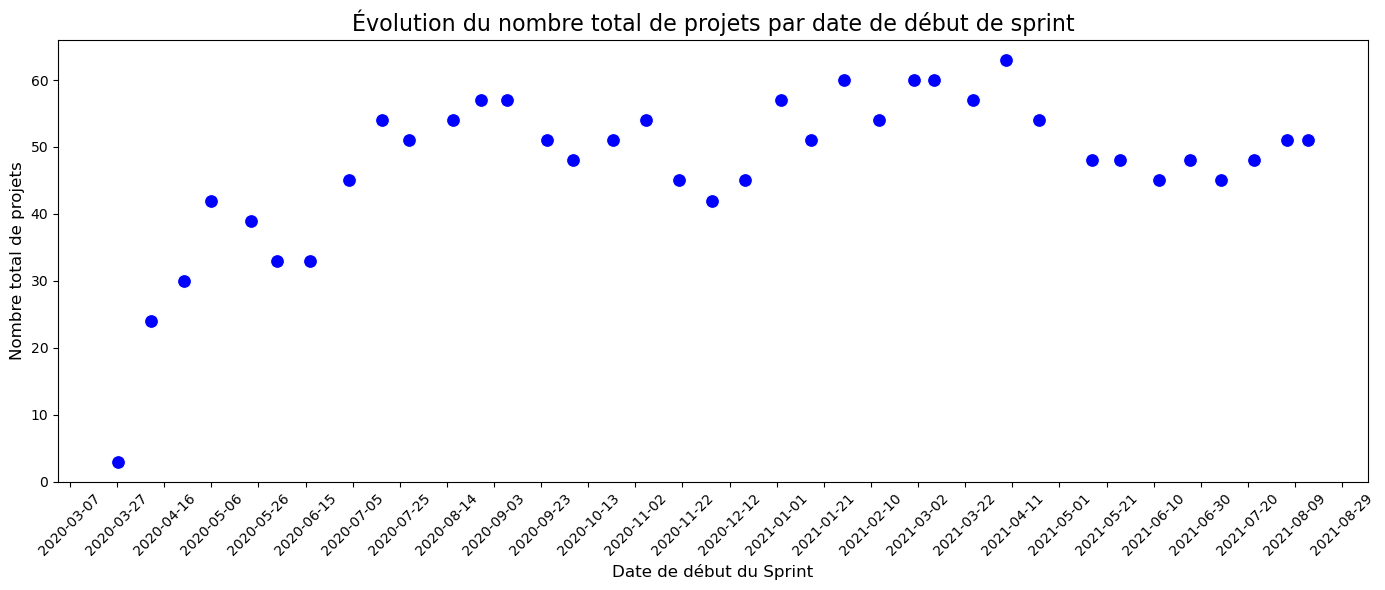

In [147]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assure-toi que la colonne 'startDate' est bien en datetime64
date_sprint_projetnb['startDate'] = pd.to_datetime(date_sprint_projetnb['startDate'], errors='coerce')

# Réinitialiser l'index du DataFrame
date_sprint_projetnb = date_sprint_projetnb.reset_index(drop=True)

# Créer un graphique à points
plt.figure(figsize=(14, 6))

# Utiliser seaborn pour une visualisation plus esthétique
sns.scatterplot(x='startDate', y='Total_projets', data=date_sprint_projetnb, s=100, color='blue')

# Ajouter des titres et des labels
plt.title('Évolution du nombre total de projets par date de début de sprint', fontsize=16)
plt.xlabel('Date de début du Sprint', fontsize=12)
plt.ylabel('Nombre total de projets', fontsize=12)

# Améliorer l'affichage des dates
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))  # Afficher un tick par jour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format des dates

plt.tight_layout()
plt.savefig('nbreprojet_transparent.png', transparent=True)

# Afficher le graphique

plt.show()


